In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sn
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix , classification_report
from matplotlib import pyplot as plt

In [55]:
df = pd.read_csv("C:/Users/X580/Documents/churn/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [57]:
# Encoding Categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'].values)   # binary encoding
df_final = pd.get_dummies(data=df, columns=['Geography'])   # one hot encoding
df_final.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [58]:
normalizer = MinMaxScaler()
columns_norm = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df_final[columns_norm]= normalizer.fit_transform(df_final[columns_norm])
df_final.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [59]:
X = df_final.drop('Exited',axis=1)
y = df_final['Exited']

In [61]:
# create test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_test.shape

(2000, 12)

In [62]:
X_train.shape

(8000, 12)

In [83]:
# create NN

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [84]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5255 - accuracy: 0.7816
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.7977
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.8076
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8124
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8152
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8170
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8188
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8186
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8253
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3920 - accura

In [85]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8485


[0.3584994971752167, 0.8485000133514404]

In [86]:
y_pred = model.predict(X_test)
y_pred[:10]

63/63 [==============================] - 0s 810us/step


array([[0.03606995],
       [0.18571146],
       [0.11807989],
       [0.1005711 ],
       [0.10442241],
       [0.16965953],
       [0.0379608 ],
       [0.53278685],
       [0.01627472],
       [0.8563646 ]], dtype=float32)

In [87]:
class_pred = []
for elem in y_pred:
    if elem > 0.5:
        class_pred.append(1)
    else:
        class_pred.append(0)
class_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

In [88]:
print(classification_report(y_test,class_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.67      0.50      0.57       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(50.722222222222214, 0.5, 'True labels')

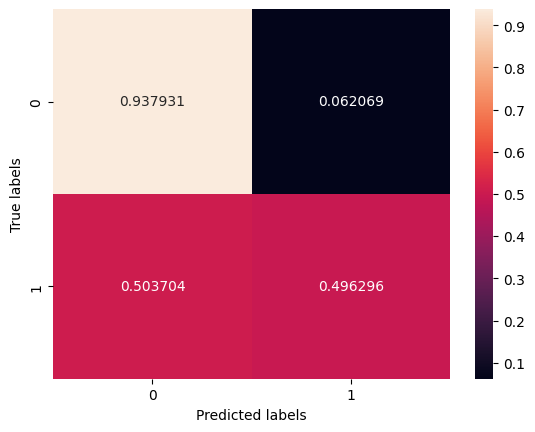

In [89]:
conf_mat = confusion_matrix(y_test,class_pred)
cmn = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
plt.figure()
sn.heatmap(cmn, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')